In [1]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import Circle, Grid, RandomRegular, GraphByDegrees
from viz import draw_data
from utils import Timer, partition
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>

In [2]:
def calc(alphas, bs, graphs, T, pool_size=32):
    pool = Pool(pool_size)
    res = []
    timer = Timer()
    
    cur = 0
    
    for graph in graphs:
        local_timer = Timer()
        
        res.append(pool.map(fun, [(graph, b, alpha, T) for b in bs for alpha in alphas]))
        
        t = local_timer.measure()
        cur += 1
        rem = len(graphs) - cur
        print(f'#{cur} passed in {local_timer.measure()},  projected end in {rem * t / 60} minutes', flush=True)
        
    timer.print_elapsed()
    return np.array(res)

In [3]:
def plot_mean_and_std(bs, data, last):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

In [4]:
def plot_avg_deg_distribuion(graphs, max_deg=20):
    s = [0] * max_deg
    for graph in graphs:
        for d, cnt in graph.degrees().items():
            if d < max_deg:
                s[d] += cnt
    s = np.array(s)
    s = s / sum(s)
    #for i in range(1, len(s)):
    #    s[i] += s[i - 1]
    plt.scatter(np.arange(len(s)), s, c='red')

In [5]:
def plot_means(bs, data, last):
    fig, ax = plt.subplots()
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    for t in cur:
        ax.scatter(bs, t, s=1, alpha=.05, c='red')
        
    cur = np.apply_along_axis(np.mean, 0, cur)
    ax.plot(bs, cur, '-')
    plt.show()

In [6]:
def get_graphs23(c2, c3, I=100):
    timer = Timer()
    graphs23 = Pool(32).map(GraphByDegrees, [{2: c2, 3: c3} for _ in range(I)])
    print(f'generated graphs in {timer.measure()} seconds', flush=True)
    return graphs23

In [8]:
alphas = [.10]
bs = partition(0, 8, 128)

In [9]:
%%notify
graphs15 = get_graphs23(100, 500)
res15 = calc(alphas, bs, graphs15, 100)

#1 passed in 3.093787431716919,  projected end in 5.104741787910461 minutes
#2 passed in 3.0174546241760254,  projected end in 4.928500652313232 minutes
#3 passed in 2.998487710952759,  projected end in 4.84754665295283 minutes
#4 passed in 2.9960334300994873,  projected end in 4.793600845336914 minutes
#5 passed in 3.0293614864349365,  projected end in 4.796480715274811 minutes
#6 passed in 3.0097389221191406,  projected end in 4.715250547726949 minutes
#7 passed in 2.979440212249756,  projected end in 4.618125307559967 minutes
#8 passed in 3.012948751449585,  projected end in 4.619846709569296 minutes
#9 passed in 3.0174314975738525,  projected end in 4.576430900891622 minutes
#10 passed in 2.993032217025757,  projected end in 4.489540100097656 minutes
#11 passed in 2.988863945007324,  projected end in 4.433474091688792 minutes
#12 passed in 3.0234451293945312,  projected end in 4.434377797444662 minutes
#13 passed in 2.984018087387085,  projected end in 4.326819312572479 minutes
#14

<IPython.core.display.Javascript object>


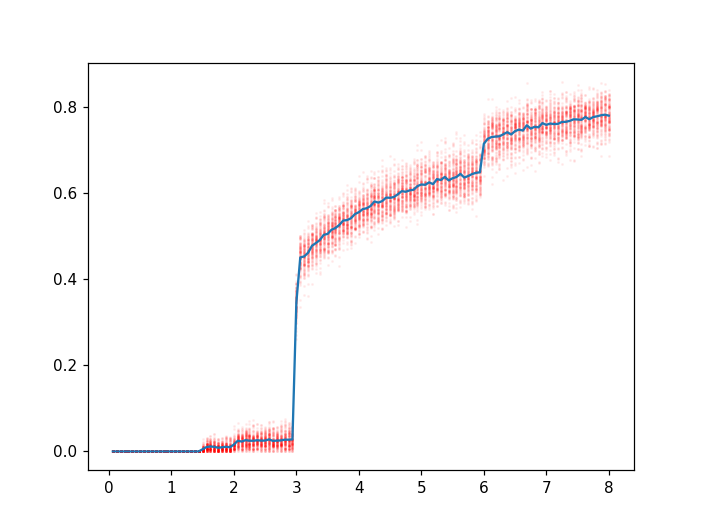

<IPython.core.display.Javascript object>

In [11]:
plot_means(bs, res15, 30)

In [12]:
%%notify
graphs51 = get_graphs23(500, 100)
res51 = calc(alphas, bs, graphs51, 100)

generated graphs in 2.0970194339752197 seconds
#1 passed in 2.5381033420562744,  projected end in 4.187861466407776 minutes
#2 passed in 2.51408314704895,  projected end in 4.106327239672343 minutes
#3 passed in 2.517253875732422,  projected end in 4.069551567236583 minutes
#4 passed in 2.4802744388580322,  projected end in 3.9684329986572267 minutes
#5 passed in 2.497868537902832,  projected end in 3.9549513459205627 minutes
#6 passed in 2.4890079498291016,  projected end in 3.8994386911392214 minutes
#7 passed in 2.5965354442596436,  projected end in 4.02461256980896 minutes
#8 passed in 2.8081068992614746,  projected end in 4.305751848220825 minutes
#9 passed in 2.482508420944214,  projected end in 3.7651283701260883 minutes
#10 passed in 2.480952262878418,  projected end in 3.721420168876648 minutes
#11 passed in 2.485243797302246,  projected end in 3.6864368319511414 minutes
#12 passed in 2.5065114498138428,  projected end in 3.6762091000874837 minutes
#13 passed in 2.468201160430

<IPython.core.display.Javascript object>


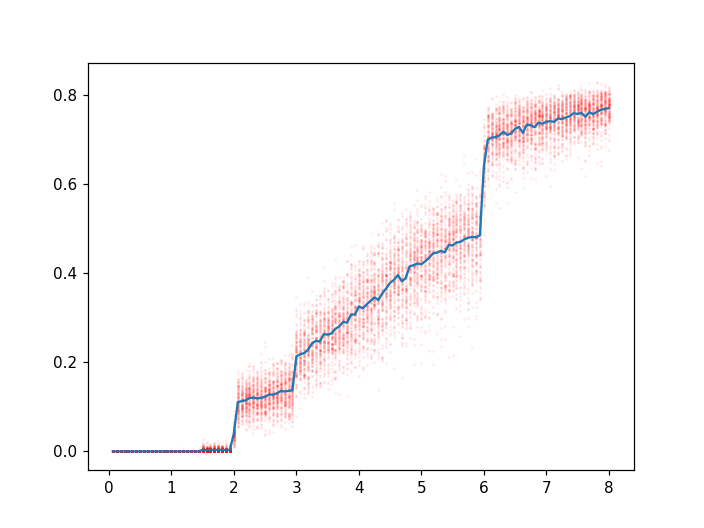

In [13]:
plot_means(bs, res51, 30)

In [14]:
%%notify
graphs33 = get_graphs23(300, 300)
res33 = calc(alphas, bs, graphs33, 100)

generated graphs in 1.7538728713989258 seconds
#1 passed in 2.821230173110962,  projected end in 4.655019950866699 minutes
#2 passed in 2.7740371227264404,  projected end in 4.530916786193847 minutes
#3 passed in 2.800755262374878,  projected end in 4.527879194418589 minutes
#4 passed in 2.7748889923095703,  projected end in 4.439812850952149 minutes
#5 passed in 2.7928826808929443,  projected end in 4.422053674856822 minutes
#6 passed in 2.7679383754730225,  projected end in 4.336428197224935 minutes
#7 passed in 3.267648458480835,  projected end in 5.064846241474152 minutes
#8 passed in 3.1051127910614014,  projected end in 4.761164172490438 minutes
#9 passed in 2.7752273082733154,  projected end in 4.209088242053985 minutes
#10 passed in 2.7635297775268555,  projected end in 4.145285725593567 minutes
#11 passed in 2.7948641777038574,  projected end in 4.1457084774971005 minutes
#12 passed in 2.810657262802124,  projected end in 4.122289975484212 minutes
#13 passed in 2.8014104366302

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


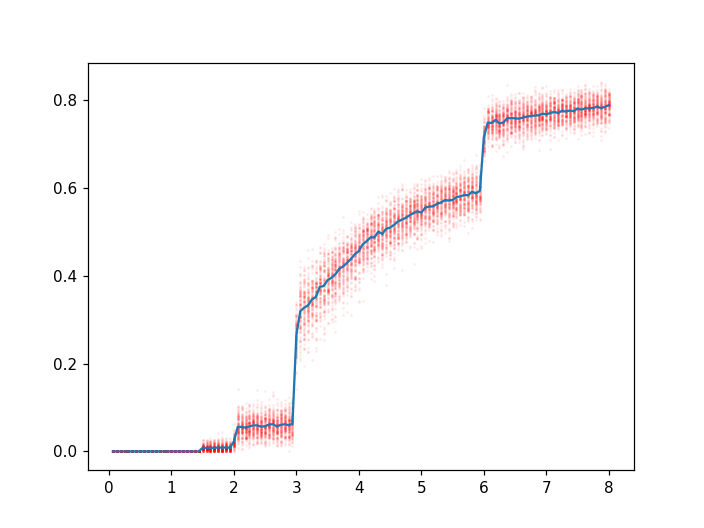

In [15]:
plot_means(bs, res33, 30)

In [16]:
%%notify
graphs06 = get_graphs23(0, 600)
res06 = calc(alphas, bs, graphs06, 100)

generated graphs in 2.5990936756134033 seconds
#1 passed in 3.1057329177856445,  projected end in 5.124451053142548 minutes
#2 passed in 3.1071126461029053,  projected end in 5.074941309293111 minutes
#3 passed in 3.0755441188812256,  projected end in 4.972122720877329 minutes
#4 passed in 3.0904757976531982,  projected end in 4.944753265380859 minutes
#5 passed in 3.0883994102478027,  projected end in 4.889957427978516 minutes
#6 passed in 3.0565311908721924,  projected end in 4.788557688395183 minutes
#7 passed in 3.046809434890747,  projected end in 4.722546863555908 minutes
#8 passed in 3.072572946548462,  projected end in 4.711271572113037 minutes
#9 passed in 3.091923236846924,  projected end in 4.689410400390625 minutes
#10 passed in 3.08302903175354,  projected end in 4.624535322189331 minutes
#11 passed in 3.0907979011535645,  projected end in 4.584675065676371 minutes
#12 passed in 3.06447434425354,  projected end in 4.494523557027181 minutes
#13 passed in 3.6425938606262207,

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


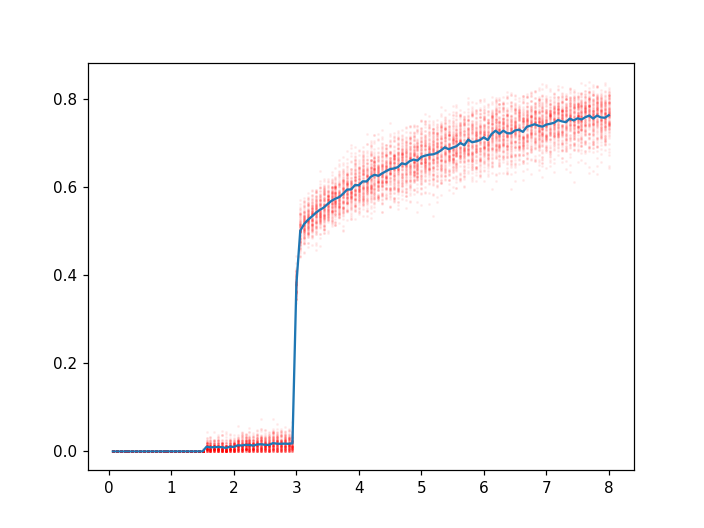

In [17]:
plot_means(bs, res06, 30)

In [15]:
%%notify
graphs06s = get_graphs23(10, 600)
res06s = calc(alphas, partition(5, 7, 32), graphs06s, 10000)

generated graphs in 1.626939058303833 seconds
#1 passed in 88.499276638031,  projected end in 146.02379701137542 minutes
#2 passed in 86.62815046310425,  projected end in 141.4926364103953 minutes
#3 passed in 88.12379050254822,  projected end in 142.46678539514542 minutes
#4 passed in 86.36054348945618,  projected end in 138.176859664917 minutes
#5 passed in 86.01544857025146,  projected end in 136.19111746549606 minutes
#6 passed in 86.48855137825012,  projected end in 135.49872115453084 minutes
#7 passed in 88.52074956893921,  projected end in 137.20715407133102 minutes
#8 passed in 86.85017395019531,  projected end in 133.17025685310364 minutes
#9 passed in 86.94185614585876,  projected end in 131.86180611451468 minutes
#10 passed in 86.45745611190796,  projected end in 129.6861755847931 minutes
#11 passed in 86.41556191444397,  projected end in 128.18307537237803 minutes
#12 passed in 86.05234289169312,  projected end in 126.21009276707967 minutes
#13 passed in 86.95695090293884, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


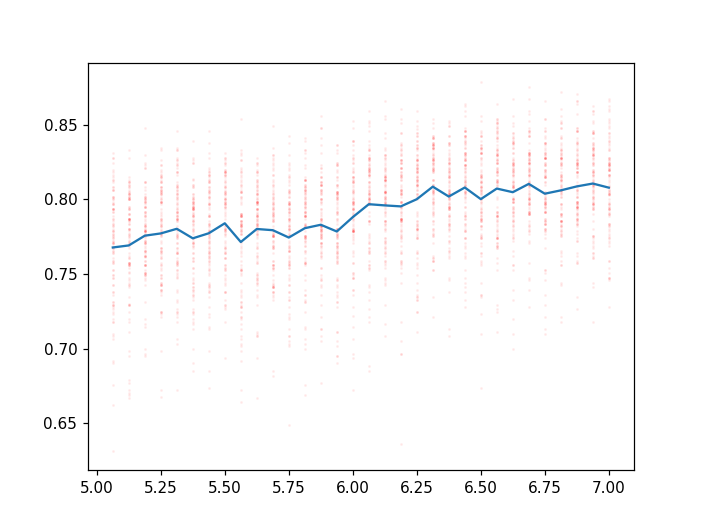

In [16]:
plot_means(partition(5, 7, 32), res06s, 1000)

<IPython.core.display.Javascript object>


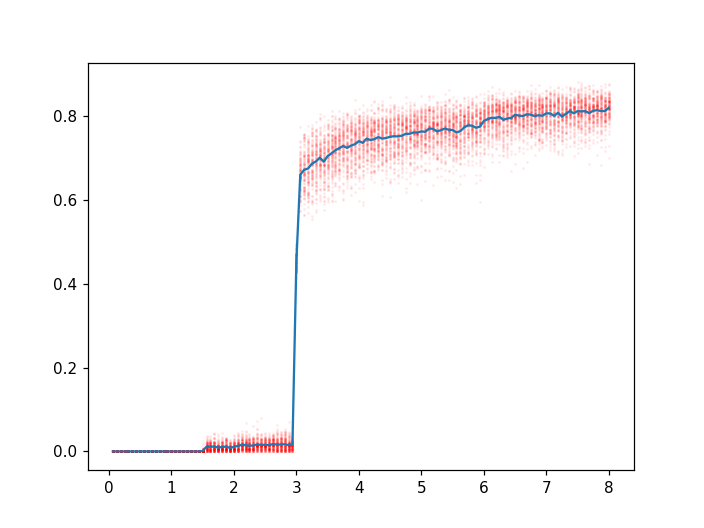

In [23]:
plot_means(bs, res06s, 30)

In [ ]:
%%notify
graphs06ss = get_graphs23(50, 600)
res06ss = calc(alphas, bs, graphs06, 300)


In [17]:
%%notify
graphs = Pool(32).map(GraphByDegrees, [{2: 300, 4: 300} for _ in range(100)])

<IPython.core.display.Javascript object>

In [20]:
res = calc(alphas, partition(0, 16, 256), graphs, 1000)

#1 passed in 65.45449185371399,  projected end in 107.99990408420562 minutes
#2 passed in 64.3339147567749,  projected end in 105.07871731122334 minutes
#3 passed in 64.51477265357971,  projected end in 104.29887474775315 minutes
#4 passed in 64.28052473068237,  projected end in 102.84882926940918 minutes
#5 passed in 64.3770694732666,  projected end in 101.93035093943278 minutes
#6 passed in 64.28935623168945,  projected end in 100.71998134454091 minutes
#7 passed in 63.8773307800293,  projected end in 99.00985310077667 minutes
#8 passed in 64.16319417953491,  projected end in 98.38355490366618 minutes
#9 passed in 63.51373314857483,  projected end in 96.32915362517039 minutes
#10 passed in 64.04595994949341,  projected end in 96.06893169879913 minutes
#11 passed in 65.16662096977234,  projected end in 96.66377053260803 minutes
#12 passed in 63.68302583694458,  projected end in 93.40176318486532 minutes
#13 passed in 63.623462200164795,  projected end in 92.25401154756545 minutes
#14 

<IPython.core.display.Javascript object>


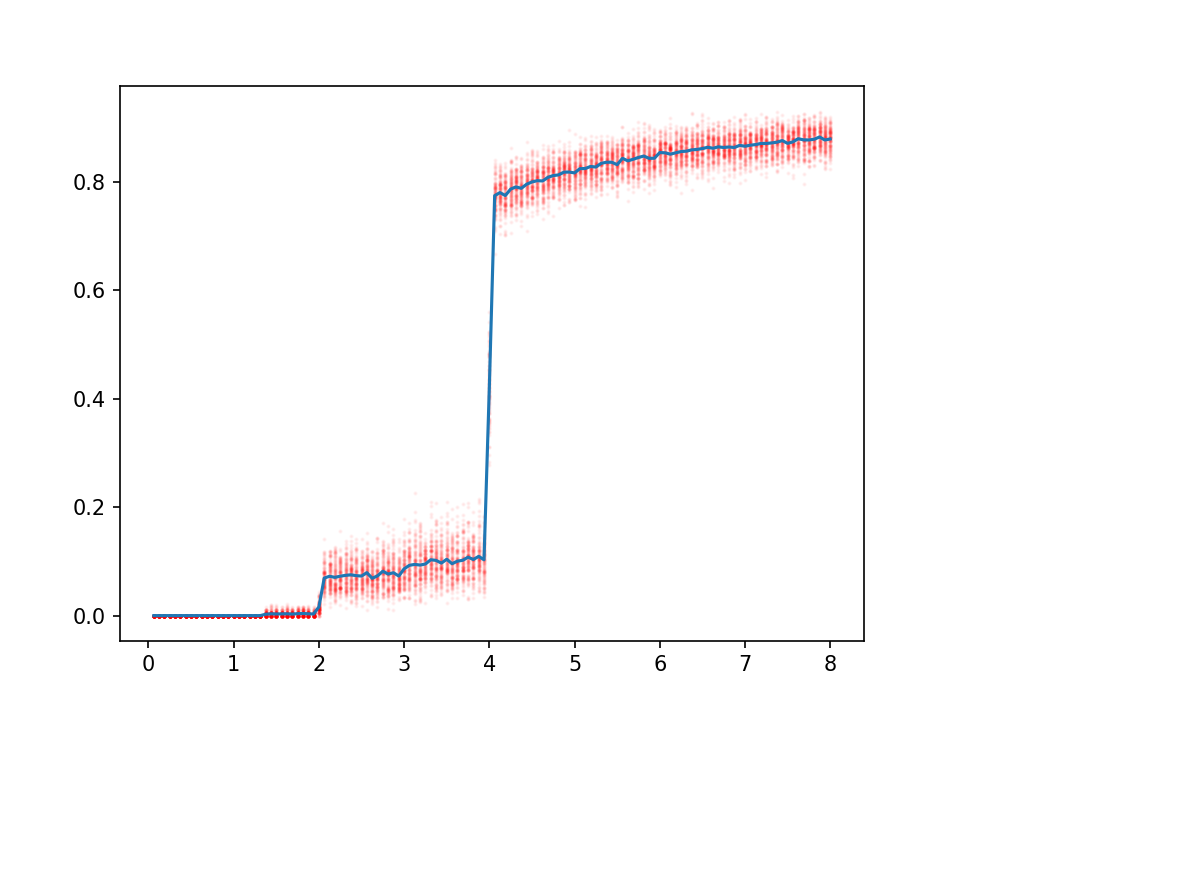

In [19]:
plot_means(bs, res, 100)

<IPython.core.display.Javascript object>


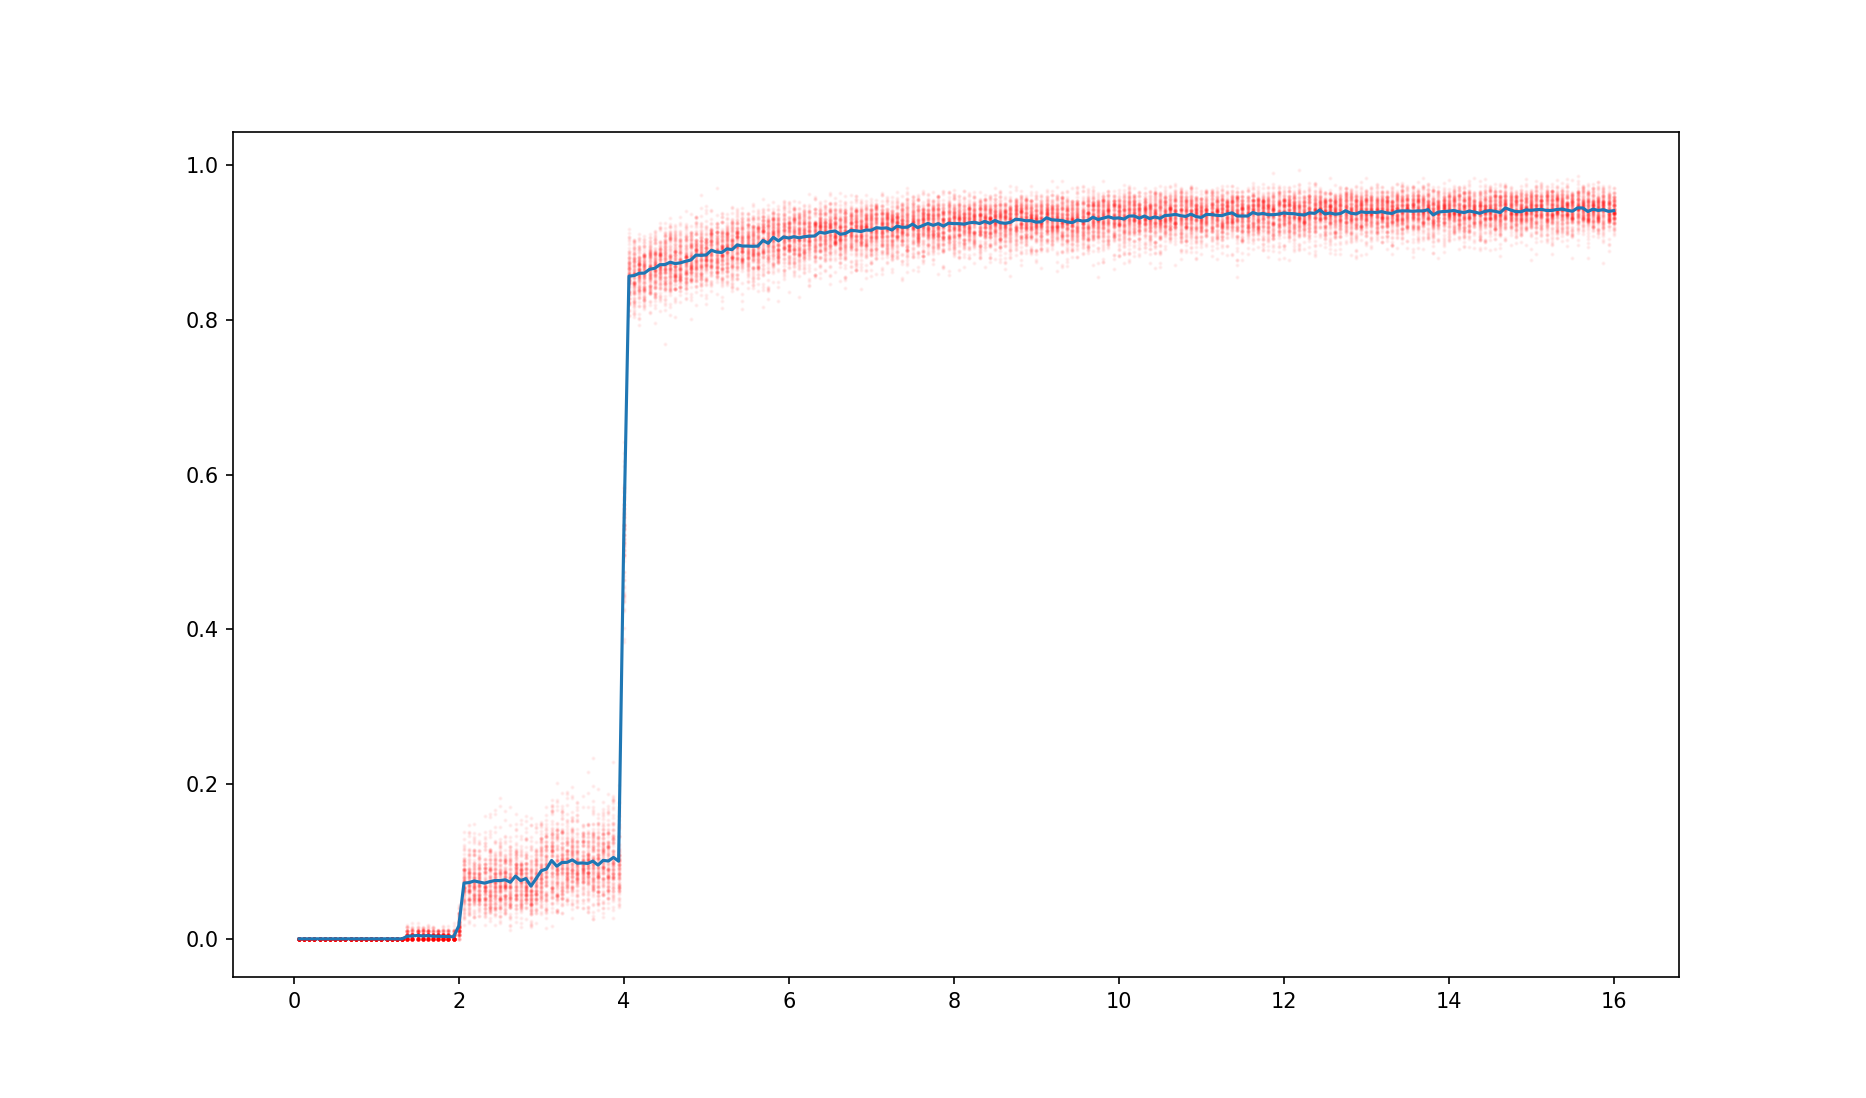

In [22]:
plot_means(partition(0, 16, 256), res, 100)

In [6]:
graphs = Pool(32).map(GraphByDegrees, [{2: 300, 5: 300} for _ in range(1000)])

In [9]:
rex = calc(alphas, partition(9, 11, 32), graphs, 50)

#1 passed in 0.49045467376708984,  projected end in 8.165975046157836 minutes
#2 passed in 0.5003342628479004,  projected end in 8.32215518951416 minutes
#3 passed in 0.4803438186645508,  projected end in 7.981645770867666 minutes
#4 passed in 0.4668586254119873,  projected end in 7.749785900115967 minutes
#5 passed in 0.47434425354003906,  projected end in 7.866125841935475 minutes
#6 passed in 0.4756941795349121,  projected end in 7.880591861406962 minutes
#7 passed in 0.4740164279937744,  projected end in 7.844892966747284 minutes
#8 passed in 0.47481632232666016,  projected end in 7.850221633911133 minutes
#9 passed in 0.47448158264160156,  projected end in 7.836779320240021 minutes
#10 passed in 0.4761509895324707,  projected end in 7.856412649154663 minutes
#11 passed in 0.47298169136047363,  projected end in 7.796248070398966 minutes
#12 passed in 0.47585439682006836,  projected end in 7.835668992996216 minutes
#13 passed in 0.4754207134246826,  projected end in 7.82060798406601

#107 passed in 0.5271313190460205,  projected end in 7.84541080792745 minutes
#108 passed in 0.5218827724456787,  projected end in 7.758589871724447 minutes
#109 passed in 0.5115389823913574,  projected end in 7.5962830781936646 minutes
#110 passed in 0.5147597789764404,  projected end in 7.635536193847656 minutes
#111 passed in 0.4901401996612549,  projected end in 7.2621768395106 minutes
#112 passed in 0.5403792858123779,  projected end in 7.997528743743897 minutes
#113 passed in 0.5279052257537842,  projected end in 7.804124903678894 minutes
#114 passed in 0.4736166000366211,  projected end in 6.9936645269393924 minutes
#115 passed in 0.47599196434020996,  projected end in 7.020800590515137 minutes
#116 passed in 0.4873013496398926,  projected end in 7.179506476720174 minutes
#117 passed in 0.4789764881134033,  projected end in 7.048874159653981 minutes
#118 passed in 0.481292724609375,  projected end in 7.074925947189331 minutes
#119 passed in 0.5020625591278076,  projected end in 

#211 passed in 0.47102832794189453,  projected end in 6.19397234916687 minutes
#212 passed in 0.486175537109375,  projected end in 6.385049025217692 minutes
#213 passed in 0.5111162662506104,  projected end in 6.704079147179922 minutes
#214 passed in 0.5076065063476562,  projected end in 6.649582767486573 minutes
#215 passed in 0.49825429916381836,  projected end in 6.518761575222015 minutes
#216 passed in 0.5044834613800049,  projected end in 6.591864267985026 minutes
#217 passed in 0.48566412925720215,  projected end in 6.337851548194886 minutes
#218 passed in 0.5099327564239502,  projected end in 6.646064551671346 minutes
#219 passed in 0.4934685230255127,  projected end in 6.42325941324234 minutes
#220 passed in 0.5469090938568115,  projected end in 7.109756231307983 minutes
#221 passed in 0.5165982246398926,  projected end in 6.7071081360181175 minutes
#222 passed in 0.5043907165527344,  projected end in 6.540201369921366 minutes
#223 passed in 0.4835517406463623,  projected end i

#315 passed in 0.4957268238067627,  projected end in 5.659498910109202 minutes
#316 passed in 0.5327112674713135,  projected end in 6.072854089736938 minutes
#317 passed in 0.48491811752319336,  projected end in 5.5199275771776835 minutes
#318 passed in 0.5073134899139404,  projected end in 5.766411844889323 minutes
#319 passed in 0.5052926540374756,  projected end in 5.73502562046051 minutes
#320 passed in 0.49469470977783203,  projected end in 5.606486002604167 minutes
#321 passed in 0.490842342376709,  projected end in 5.5546425143877665 minutes
#322 passed in 0.4767744541168213,  projected end in 5.387492060661316 minutes
#323 passed in 0.4898102283477783,  projected end in 5.526643653710683 minutes
#324 passed in 0.5014512538909912,  projected end in 5.649635775883993 minutes
#325 passed in 0.4866936206817627,  projected end in 5.475236177444458 minutes
#326 passed in 0.4981265068054199,  projected end in 5.5955648501714075 minutes
#327 passed in 0.4855496883392334,  projected end

#419 passed in 0.4673185348510742,  projected end in 4.525088020165762 minutes
#420 passed in 0.46971631050109863,  projected end in 4.5405495166778564 minutes
#421 passed in 0.4695413112640381,  projected end in 4.531034541130066 minutes
#422 passed in 0.46883177757263184,  projected end in 4.516369152069092 minutes
#423 passed in 0.4747917652130127,  projected end in 4.565868286291758 minutes
#424 passed in 0.4639294147491455,  projected end in 4.453678894042969 minutes
#425 passed in 0.47130441665649414,  projected end in 4.516626199086507 minutes
#426 passed in 0.4607982635498047,  projected end in 4.40826461315155 minutes
#427 passed in 0.47211694717407227,  projected end in 4.508678138256073 minutes
#428 passed in 0.4851858615875244,  projected end in 4.625388542811076 minutes
#429 passed in 0.46427440643310547,  projected end in 4.418306195735932 minutes
#430 passed in 0.4690113067626953,  projected end in 4.455562114715576 minutes
#431 passed in 0.46422672271728516,  projected 

#522 passed in 0.4675159454345703,  projected end in 3.7245076100031533 minutes
#523 passed in 0.463930606842041,  projected end in 3.6882104158401487 minutes
#524 passed in 0.4725658893585205,  projected end in 3.748988676071167 minutes
#525 passed in 0.4579277038574219,  projected end in 3.6252289017041526 minutes
#526 passed in 0.46231889724731445,  projected end in 3.6522872686386108 minutes
#527 passed in 0.4613001346588135,  projected end in 3.6365357398986817 minutes
#528 passed in 0.4638853073120117,  projected end in 3.649197324117025 minutes
#529 passed in 0.4737732410430908,  projected end in 3.719086253643036 minutes
#530 passed in 0.4667179584503174,  projected end in 3.6559237241744995 minutes
#531 passed in 0.4661574363708496,  projected end in 3.643760021527608 minutes
#532 passed in 0.462646484375,  projected end in 3.608609104156494 minutes
#533 passed in 0.4757044315338135,  projected end in 3.7025309006373086 minutes
#534 passed in 0.4739665985107422,  projected end

#625 passed in 0.4664294719696045,  projected end in 2.915152907371521 minutes
#626 passed in 0.464336633682251,  projected end in 2.894336779912313 minutes
#627 passed in 0.4703810214996338,  projected end in 2.9241679271062213 minutes
#628 passed in 0.4686434268951416,  projected end in 2.905565595626831 minutes
#629 passed in 0.46626758575439453,  projected end in 2.8830584208170573 minutes
#630 passed in 0.4659392833709717,  projected end in 2.873256961504618 minutes
#631 passed in 0.4733402729034424,  projected end in 2.91101188659668 minutes
#632 passed in 0.47976064682006836,  projected end in 2.942501258850098 minutes
#633 passed in 0.46167659759521484,  projected end in 2.823897063732147 minutes
#634 passed in 0.4776475429534912,  projected end in 2.9136252880096434 minutes
#635 passed in 0.4715242385864258,  projected end in 2.8684115608533225 minutes
#636 passed in 0.5196921825408936,  projected end in 3.1527645270029705 minutes
#637 passed in 0.4634981155395508,  projected 

#728 passed in 0.46361398696899414,  projected end in 2.1016962051391603 minutes
#729 passed in 0.4770016670227051,  projected end in 2.154437069098155 minutes
#730 passed in 0.46683740615844727,  projected end in 2.1007500886917114 minutes
#731 passed in 0.462815523147583,  projected end in 2.074935952822367 minutes
#732 passed in 0.4636099338531494,  projected end in 2.070770804087321 minutes
#733 passed in 0.46889400482177734,  projected end in 2.086558163166046 minutes
#734 passed in 0.46950697898864746,  projected end in 2.081458743413289 minutes
#735 passed in 0.4648747444152832,  projected end in 2.053174674510956 minutes
#736 passed in 0.4593966007232666,  projected end in 2.0213261604309083 minutes
#737 passed in 0.45892333984375,  projected end in 2.0115930716196697 minutes
#738 passed in 0.46730613708496094,  projected end in 2.0405513922373455 minutes
#739 passed in 0.46441054344177246,  projected end in 2.02016304731369 minutes
#740 passed in 0.48201942443847656,  projecte

#831 passed in 0.47161173820495605,  projected end in 1.3283589601516723 minutes
#832 passed in 0.47360968589782715,  projected end in 1.3260971069335938 minutes
#833 passed in 0.47427892684936523,  projected end in 1.320064401626587 minutes
#834 passed in 0.47508978843688965,  projected end in 1.3143999099731445 minutes
#835 passed in 0.47888922691345215,  projected end in 1.3169302940368652 minutes
#836 passed in 0.47580385208129883,  projected end in 1.300517495473226 minutes
#837 passed in 0.47152066230773926,  projected end in 1.280952807267507 minutes
#838 passed in 0.46449923515319824,  projected end in 1.2541350603103638 minutes
#839 passed in 0.46909022331237793,  projected end in 1.258712637424469 minutes
#840 passed in 0.47026634216308594,  projected end in 1.2540321350097656 minutes
#841 passed in 0.482684850692749,  projected end in 1.279101586341858 minutes
#842 passed in 0.5422317981719971,  projected end in 1.4278651396433513 minutes
#843 passed in 0.4720022678375244,  

#934 passed in 0.48793864250183105,  projected end in 0.5367272615432739 minutes
#935 passed in 0.4677913188934326,  projected end in 0.5067692796389262 minutes
#936 passed in 0.4833984375,  projected end in 0.5156196594238281 minutes
#937 passed in 0.4662356376647949,  projected end in 0.4895426630973816 minutes
#938 passed in 0.4842383861541748,  projected end in 0.5003742456436158 minutes
#939 passed in 0.47589874267578125,  projected end in 0.4838255405426025 minutes
#940 passed in 0.47214579582214355,  projected end in 0.4721407890319824 minutes
#941 passed in 0.4714980125427246,  projected end in 0.4636345545450846 minutes
#942 passed in 0.47784876823425293,  projected end in 0.46191609700520836 minutes
#943 passed in 0.47147417068481445,  projected end in 0.4478961586952209 minutes
#944 passed in 0.47684264183044434,  projected end in 0.44504756927490235 minutes
#945 passed in 0.4708414077758789,  projected end in 0.4316004713376363 minutes
#946 passed in 0.46415090560913086,  p

<IPython.core.display.Javascript object>


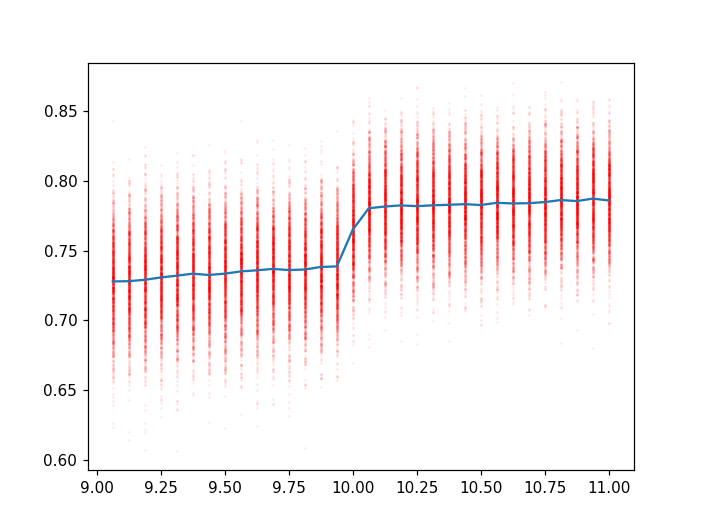

In [10]:
plot_means(partition(9, 11, 32), rex, 10)

In [12]:
with open('rex.npy', 'wb') as f:
    np.save(f, rex)

<IPython.core.display.Javascript object>


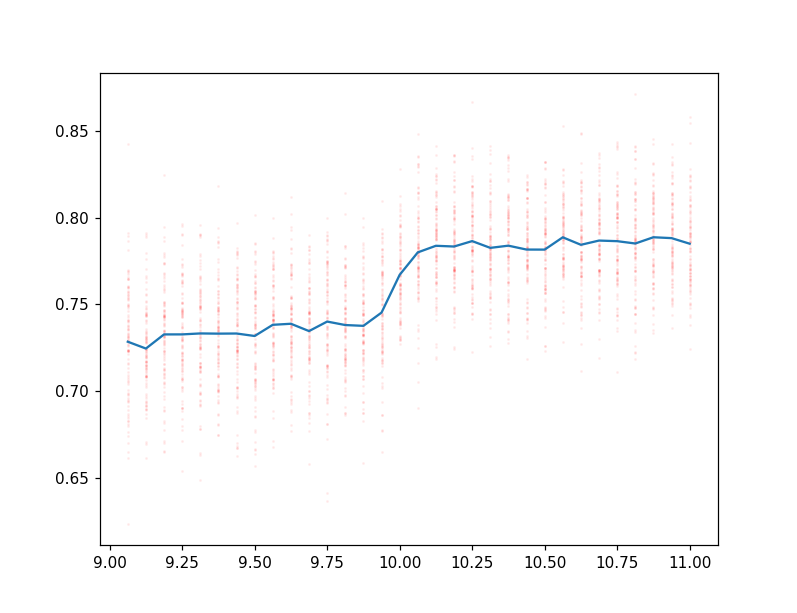

In [13]:
plot_means(partition(9, 11, 32), rex[:100], 10)